In [50]:
import powerlaw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [20]:
df = pd.read_csv("degrees.csv")

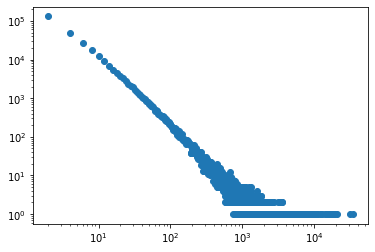

In [49]:
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')

In [54]:
x

array([ 1546,  2350,  1028, ..., 10410,   298,  1402])

In [55]:
y

array([ 3,  1,  1, ...,  1, 22,  2])

In [67]:
def power_law(x,b,a):
    return (b+x)**(-a)

In [69]:
def zipf_mandelbrox(x,b,a):
    return np.exp(b+x,a)

In [70]:
pars, cov = curve_fit(f=power_law,xdata=x,ydata=y,maxfev=5000)

/tmp/ipykernel_465971/531751339.py:2: RuntimeWarning: invalid value encountered in power
  return (b+x)**(-a)


In [66]:
pars

array([-1.99999988e+00,  7.90646779e+02,  3.20711939e-01])

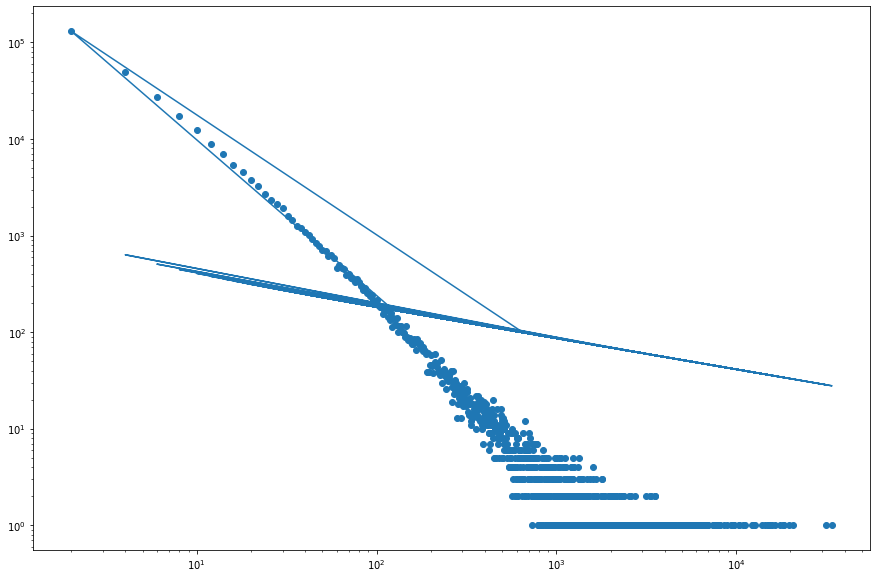

In [62]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# The data, scattered
ax.scatter(x,y)
ax.set_xscale('log')
ax.set_yscale('log')

# The fit
ax.plot(x,power_law(x,*pars))

In [23]:
degrees = df['deg'].to_numpy()
degrees

array([18167,   100,   554, ...,     2,     2,     2])

Calculating best minimal value for power law fit


<AxesSubplot:>

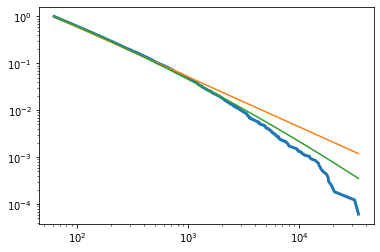

In [36]:
fit = powerlaw.Fit(degrees,linear_bins=True)
fig1 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig1)
fit.lognormal.plot_ccdf(ax=fig1)

In [46]:
fit.xmin

62.0

Calculating best minimal value for power law fit


<AxesSubplot:>

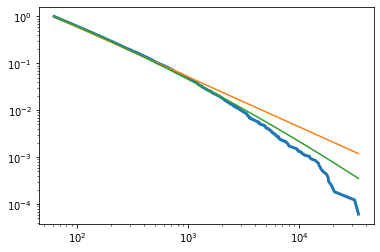

In [37]:
fit = powerlaw.Fit(degrees,linear_bins=False)
fig1 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig1)
fit.lognormal.plot_ccdf(ax=fig1)

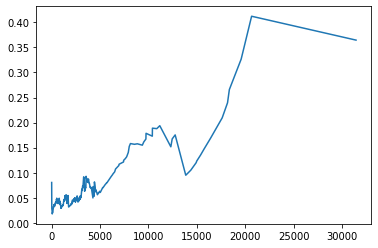

In [42]:
plt.plot(fit.xmins, fit.Ds)


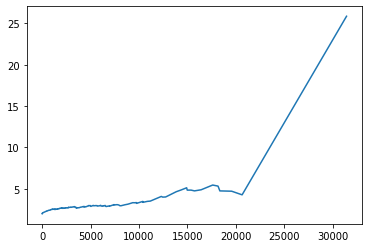

In [45]:
plt.plot(fit.xmins, fit.alphas)

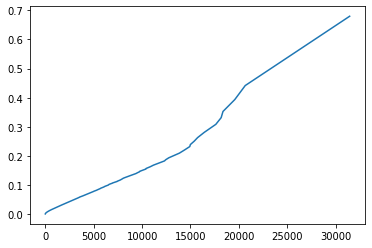

In [44]:
plt.plot(fit.xmins, fit.sigmas/fit.alphas)

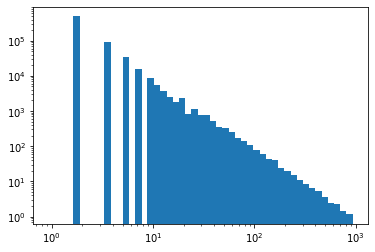

In [35]:

# something random to plot
data = (np.random.random(10000)*10)**3
data = degrees

# log-scaled bins
bins = np.logspace(0, 3, 50)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

In [47]:
bins = np.logspace(0, 3, 50)

In [48]:
bins

array([   1.        ,    1.1513954 ,    1.32571137,    1.52641797,
          1.75751062,    2.02358965,    2.32995181,    2.6826958 ,
          3.0888436 ,    3.55648031,    4.09491506,    4.71486636,
          5.42867544,    6.25055193,    7.19685673,    8.28642773,
          9.54095476,   10.98541142,   12.64855217,   14.56348478,
         16.76832937,   19.30697729,   22.22996483,   25.59547923,
         29.47051703,   33.93221772,   39.06939937,   44.98432669,
         51.79474679,   59.63623317,   68.6648845 ,   79.06043211,
         91.0298178 ,  104.81131342,  120.67926406,  138.94954944,
        159.98587196,  184.20699693,  212.09508879,  244.20530945,
        281.1768698 ,  323.74575428,  372.75937203,  429.19342601,
        494.17133613,  568.9866029 ,  655.12855686,  754.31200634,
        868.51137375, 1000.        ])

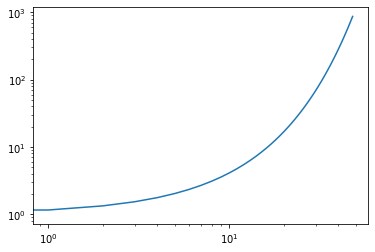

In [34]:
plt.plot(bins[:-1])
plt.xscale('log')
plt.yscale('log')

In [71]:
from scipy.stats import powerlaw

In [72]:
powerlaw.fit(degrees)

(0.08616359045337302, 1.9999999999999996, 36010.864647240305)